In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
df_index=pd.read_csv("economic_index.csv")

In [39]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [40]:
# drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [41]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [42]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

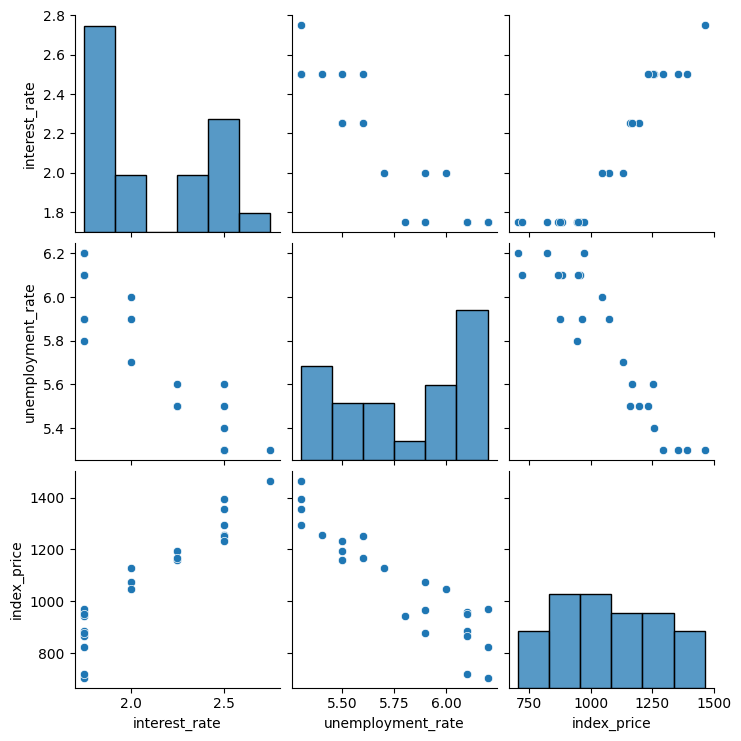

In [43]:
# Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [44]:
# The negative value is due to inverse corr
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

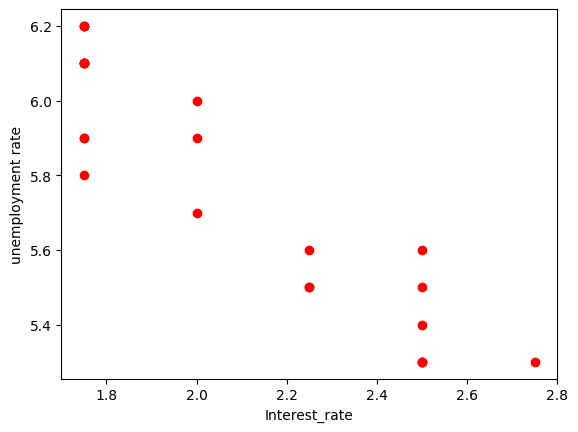

In [45]:
# Visulise the data points more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel("Interest_rate")
plt.ylabel('unemployment rate')

In [46]:
# independent and dependent features
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [47]:
# # train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

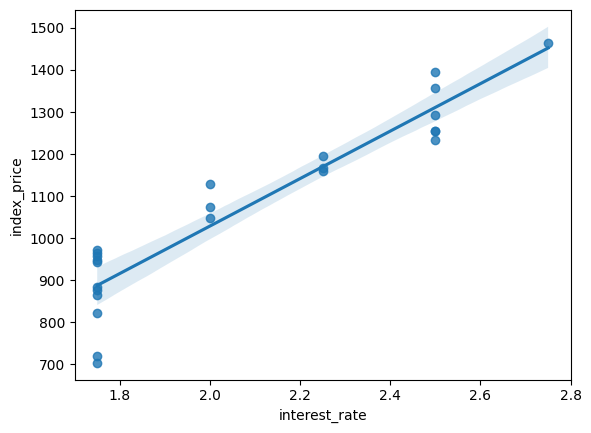

In [49]:
# regplot plot data and a regression model fit
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

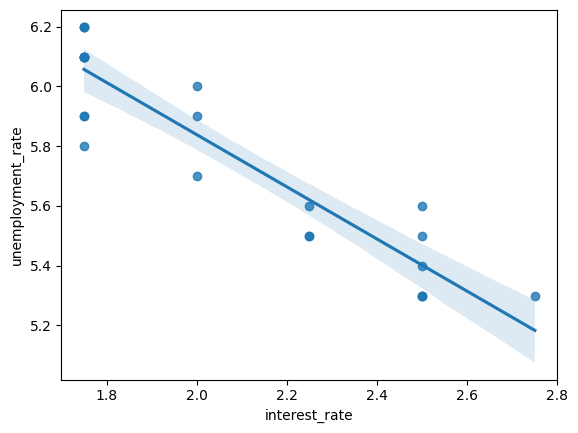

In [50]:
# regplot plot data and a regression model fit
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])


In [51]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
# fit_transform converts it into 2-D array
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [53]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [54]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [55]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
# cross_val_score helps you avoid overfitting and get a better estimate of how your model will perform on unseen data.
# 1.Splits your dataset into 5 (or cv) parts.

# 2.Trains the model on 4 parts and tests on the 1 left out.

# 3.Repeats this process cv times, changing the test set each time.

# 4.Returns an array of accuracy/scores from each fold.

In [56]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [ ]:
# There will be 3 neg validation scores 
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [58]:
# Doing the average of above three negative scores
np.mean(validation_score)

-5914.828180162386

In [ ]:
# Predication
# Why we are using x_test data here in regression.pred(x_test)?
# ➤ "Hey model, now that you've learned the pattern, what do you think the outputs (y-values) should be for these new inputs?"
y_pred=regression.predict(x_test)

In [60]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [61]:
# Performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)




8108.567426306604
73.80444932337097
90.04758423359621


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
# display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


Assumptions


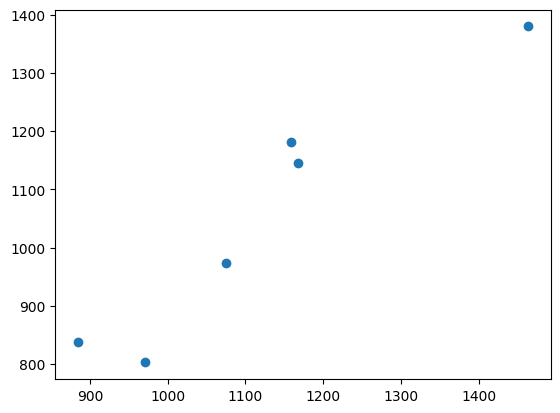

In [65]:
plt.scatter(y_test,y_pred)

In [66]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


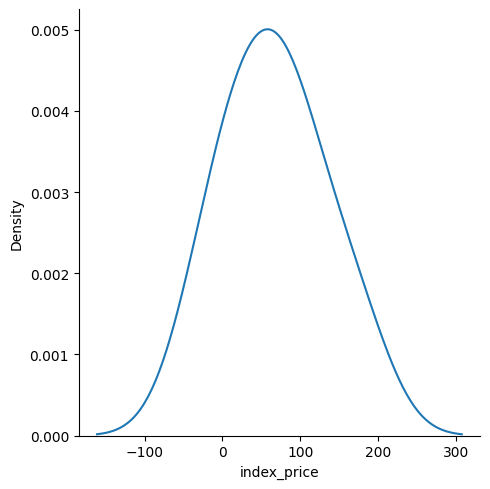

In [ ]:
# Plot this residuals
sns.displot(residuals,kind='kde')
# This type of curve means the created model is good

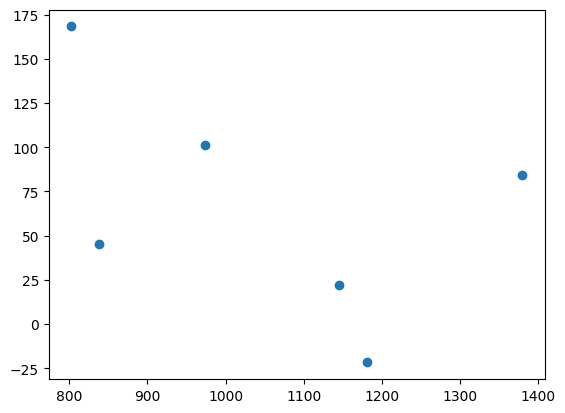

In [70]:
# Scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)

In [71]:
# OLS Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [ ]:
model.summary()

c:\Users\BIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                       0.754
Time:                        20:11:36   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Printing the coefficient of Linear Regression model and verifying it from OLS
print(regression.coef_)

[  88.27275507 -116.25716066]
